# Demand forcasting for phone devices in supply chain

## Table of Contents
-  [Data Source](#2-data-source)
-  [Data Checks to Perform](#3-data-checks-to-perform)
-  [Data Exploration (EDA) with Visualization](#4-data-exploration-eda-with-visualization)
-  [Test for Skewness and Normality](#5-test-for-skewness-and-normality)
-  [Data Cleaning, Processing and Transformation](#6-data-cleaning-processing-and-transformation)
-  [Overall data processing and transformation](#7-overall-data-processing-and-transformation)

### Import required packages

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

### Glossary for Column Names

- **YearMonth** -year and month, stored in `YYYYMM` format.
- **country** - The country where the data (e.g., sales, claims, or launches) is recorded.  
- **Make** - The brand or manufacturer of the phone device (e.g., Oppo).  
- **Phone Series** - The series or product line the phone belongs to (e.g., OPPO A10).  
- **PHONE_LAUNCH_DATE** - The official launch date of the phone model in a specific market.  
- **ModelFamily** - A grouping or family of models with similar characteristics or under the same product line.  
- **Predecessor** - The model that was launched **before** the current phone as part of the product lifecycle.  
- **Succesor** - The model that was launched **after** the current phone, replacing or succeeding it.  
- **Model Age (Days)** - The number of days since the phone model was launched.  
- **Model Age (Months)** - The number of months since the phone model was launched.  
- **Model** - The specific name or identifier of the phone model (e.g., iPhone 13, Galaxy S21).  
- **SKU (Stock Keeping Unit)** - A unique identifier or code assigned to a product (or variation) for inventory tracking and management purposes.  
- **SKU No Colour** - A standardized SKU that does not account for color variations of the product.  
- **Colour** - The color of the phone device (e.g., black, white, blue).  
- **Size** - Storage capacity of the device (e.g., 128GB, 256GB).  
- **Closing Subs Monthly** - The total number of subscribers or active phone users at the end of a given month.  
- **Filed Claims** - The number of claims (e.g., insurance claims) filed for the phone model.  
- **Claims** - The total number of claims processed for the phone model.  
- **Claims Swap** - The number of claims where the phone was **swapped** (replaced with another unit of the same model).  
- **Claims Replacement** - The number of claims where the phone was replaced entirely with a new unit.  
- **IR Rate Swap** - Incident Rate for swaps: The proportion of claims that resulted in a **swap**.  
- **IR Rate Replacement** - Incident Rate for replacements: The proportion of claims that resulted in a **replacement**.  
- **IR Rate Monthly** - The overall incident rate for claims on a monthly basis.  
- **Churn Rate** - The percentage of users who stop using the phone model or service within a given time period.  
- **Churn** - The total number of users who have stopped using the phone model or service.  

Further clarifications:  
* Filed Claims: Total claims submitted by customers (including pending, rejected, or invalid claims).
* Claims: Valid and approved claims that have been successfully processed

**What each row in the dataset mean:**   
Each row in the dataset represents the demand and performance data of a specific phone series for a particular month and location (e.g., California). It provides various metrics about the phone series, including its age, claims (e.g., filed or replaced), churn rate, and subscribers.

### Import dataset as Pandas dataframe

In [2]:
pd.set_option('display.max_columns', None)

df = pd.read_excel("dataset.xlsx")
df_origin = df.copy()
df.head()

,YearMonth,country,Make,Phone Series,PHONE_LAUNCH_DATE,ModelFamily,Predecessor,Succesor,Model Age (Days),Model Age (Months),Model,SKU,SKU No Colour,Colour,Size,Closing Subs Monthly,Filed Claims,Claims,Claims Swap,Claims Replacement,IR Rate Swap,IR Rate Replacement,IR Rate Monthly,Churn Rate,Churn
0,201901,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,456,14,A12 32GB BLUE,A12BLU,A12,Blue,32,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
1,201902,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,484,15,A12 32GB BLUE,A12BLU,A12,Blue,32,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
2,201903,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,515,16,A12 32GB BLUE,A12BLU,A12,Blue,32,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
3,201904,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,545,17,A12 32GB BLUE,A12BLU,A12,Blue,32,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
4,201905,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,576,18,A12 32GB BLUE,A12BLU,A12,Blue,32,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0


In [3]:
df.rename(columns={
    'YearMonth': 'year_month',
    'country': 'us_state',
    'Make': 'make',
    'Phone Series': 'phone_series',
    'PHONE_LAUNCH_DATE': 'phone_launch_date',
    'ModelFamily': 'model_family',
    'Predecessor': 'predecessor',
    'Succesor': 'successor',
    'Model Age (Days)': 'model_age_days',
    'Model Age (Months)': 'model_age_months',
    'Model': 'model',
    'SKU': 'sku',
    'SKU No Colour': 'sku_no_colour',
    'Colour': 'colour',
    'Size': 'size',
    'Closing Subs Monthly': 'closing_subs_monthly',
    'Filed Claims': 'filed_claims',
    'Claims': 'claims',
    'Claims Swap': 'claims_swap',
    'Claims Replacement': 'claims_replacement',
    'IR Rate Swap': 'ir_rate_swap',
    'IR Rate Replacement': 'ir_rate_replacement',
    'IR Rate Monthly': 'ir_rate_monthly',
    'Churn Rate': 'churn_rate',
    'Churn': 'churn'
}, inplace=True)

df.head()

,year_month,us_state,make,phone_series,phone_launch_date,model_family,predecessor,successor,model_age_days,model_age_months,model,sku,sku_no_colour,colour,size,closing_subs_monthly,filed_claims,claims,claims_swap,claims_replacement,ir_rate_swap,ir_rate_replacement,ir_rate_monthly,churn_rate,churn
0,201901,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,456,14,A12 32GB BLUE,A12BLU,A12,Blue,32,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
1,201902,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,484,15,A12 32GB BLUE,A12BLU,A12,Blue,32,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
2,201903,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,515,16,A12 32GB BLUE,A12BLU,A12,Blue,32,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
3,201904,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,545,17,A12 32GB BLUE,A12BLU,A12,Blue,32,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
4,201905,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,576,18,A12 32GB BLUE,A12BLU,A12,Blue,32,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0


In [4]:
df.shape      #(13381, 25)
df.dtypes

year_month                       int64
us_state                        object
make                            object
phone_series                    object
phone_launch_date       datetime64[ns]
model_family                    object
predecessor                     object
successor                       object
model_age_days                   int64
model_age_months                 int64
model                           object
sku                             object
sku_no_colour                   object
colour                          object
size                             int64
closing_subs_monthly             int64
filed_claims                   float64
claims                         float64
claims_swap                    float64
claims_replacement             float64
ir_rate_swap                   float64
ir_rate_replacement            float64
ir_rate_monthly                float64
churn_rate                     float64
churn                            int64
dtype: object

In [5]:
# convert YearMonth to date object to ensure ease of filtering and grouping.
# date is default to the first day of the month.
df['year_month'] = pd.to_datetime(df['year_month'].astype(str), format='%Y%m')

### Data Checks to Perform

- Check missing values
- Check duplicates
- Check the number of unique values for each column
- Check statistics of dataset
- Check various categories present in the different categorical column 

#### Check missing values

In [6]:
pd.set_option("display.max_rows", None)
df.isna().sum()

year_month                 0
us_state                   0
make                       0
phone_series            1843
phone_launch_date          0
model_family               0
predecessor             3170
successor               1917
model_age_days             0
model_age_months           0
model                      0
sku                        0
sku_no_colour              0
colour                     0
size                       0
closing_subs_monthly       0
filed_claims            4933
claims                  6505
claims_swap             6505
claims_replacement      6505
ir_rate_swap            6505
ir_rate_replacement     6505
ir_rate_monthly         6505
churn_rate                 0
churn                      0
dtype: int64

Possible reasons for NaN:   
- Predecessor is NaN because the phone is the first model of its phone_series.

- Total number of Filed Claims and Claims is not equal because some filed claims are not processed. Eg, if some filed claims are rejected. 

- If there's no claims from the particular phone model, then there would also be no claims swap, claims replacement, IR Rate Swap, IR Rate Replacement, and IR Rate Monthly.  Hence, we can see that these columns have the same number (6505) of NaN values. 

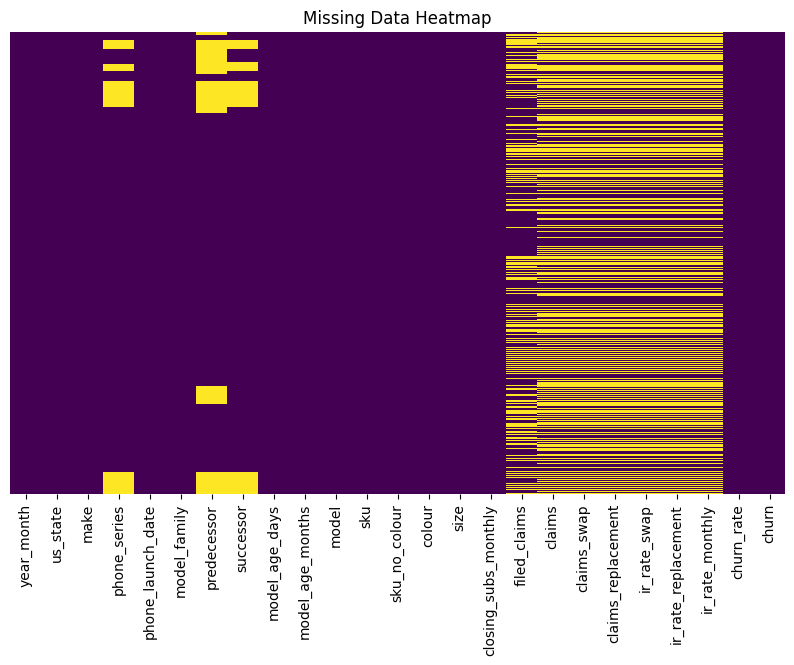

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

#### Check duplicates
There are no duplicates

In [8]:
df.duplicated().sum() # 0

# Check for duplicate rows based on specific columns
duplicates = df.duplicated(subset=['year_month', 'us_state', 'make', 'phone_series', 'model_family', 'model'])

duplicate_count = duplicates.sum()
duplicate_count

0

#### Check number of unique values

In [9]:
# Check number of unique values of each column
df.nunique()

year_month                59
us_state                   3
make                       3
phone_series              18
phone_launch_date         41
model_family              39
predecessor               23
successor                 30
model_age_days          1175
model_age_months         112
model                    124
sku                      125
sku_no_colour             57
colour                    15
size                       5
closing_subs_monthly    4820
filed_claims             142
claims                   103
claims_swap               73
claims_replacement        73
ir_rate_swap             864
ir_rate_replacement      480
ir_rate_monthly         5115
churn_rate              9208
churn                    693
dtype: int64

In [10]:
# Get the number of unique rows based on the specified subset of columns
unique_rows_count = df[['phone_series', 'model_family', 'model', 'size']].drop_duplicates().shape[0]

print(f"Number of unique rows based on the subset: {unique_rows_count}")

Number of unique rows based on the subset: 124


#### Check statistics of dataset

In [11]:
df.describe()

,year_month,phone_launch_date,model_age_days,model_age_months,size,closing_subs_monthly,filed_claims,claims,claims_swap,claims_replacement,ir_rate_swap,ir_rate_replacement,ir_rate_monthly,churn_rate,churn
count,13381,13381,13381.000000,13381.000000,13381.000000,13381.000000,8448.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,13381.000000,13381.000000
mean,2021-07-31 22:22:30.033629952,2020-01-01 12:35:21.097078016,606.834168,19.297736,159.453554,1860.416710,9.452296,8.005817,5.653578,2.352240,0.000311,0.000104,0.003846,0.100821,77.552948
min,2019-01-01 00:00:00,2017-11-01 00:00:00,-1324.000000,-44.000000,16.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000106,0.000000,0.000000
25%,2020-06-01 00:00:00,2018-10-24 00:00:00,180.000000,5.000000,128.000000,207.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.001468,0.013632,5.000000
50%,2021-09-01 00:00:00,2020-01-01 00:00:00,587.000000,19.000000,128.000000,928.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.002534,0.027651,24.000000
75%,2022-10-01 00:00:00,2020-11-01 00:00:00,1044.000000,34.000000,256.000000,2527.000000,10.000000,9.000000,6.000000,2.000000,0.000000,0.000000,0.004280,0.053250,87.000000
max,2023-11-01 00:00:00,2022-11-16 00:00:00,2220.000000,72.000000,256.000000,41031.000000,329.000000,196.000000,129.000000,189.000000,0.071429,0.045455,0.200000,21.000000,3293.000000
std,NaN,NaN,630.826196,20.684808,80.735796,2607.507749,18.175729,12.275384,8.134674,7.174185,0.001650,0.000952,0.006560,0.472259,155.657861


### Insights

- 13 numerical, 2 datetime, and 10 categorical columns
- no duplicate rows
- 10/25 columns have NaN values
- Around 36% of the dataset do not make filed claims
- Around half of the dataset (51.8%) do not have claims (claims that are processed)

Derivation:  
- Churn Rate = Churn / Closing Subs Monthly
- IR Rate Swap = Claims Swap / Closing Subs Monthly
- IR Rate Replacement = Claims Replacement / Closing Subs Monthly
- IR Rate Monthly = Claims / Closing Subs Monthly


<br>

### Deadling with NaN values

### Dealing with NaN in `phone_series` columns

Only OPPO and Samsung phones have NaN values in phone_series

In [12]:
df[df['phone_series'].isna()]['make'].unique()

array(['Oppo', 'Samsung'], dtype=object)

For OPPO phones, the successors of a given model family share the same phone series. Therefore, for rows where the phone series is missing (NaN), impute the value with the phone series of the corresponding predecessor.

In [13]:
# Available Oppo phone series 
df[df['phone_series'].notna() & (df['make'] == 'Oppo')]['phone_series'].unique()

array(['OPPO A10', 'OPPO A3', 'OPPO A500', 'OPPO A90'], dtype=object)

In [14]:
# To check that the successors of a given model family share the same phone series.

# For phone_series = OPPO A3
df[df['model_family'] == 'OPPO A3S'].head()
df[df['model_family'] == 'OPPO A5 2020'].head()

# For phone_series = OPPO A10
df[df['model_family'] == 'OPPO A12'].head()
df[df['model_family'] == 'OPPO A15'].head()
df[df['model_family'] == 'OPPO A16'].head()

# For phone_series = OPPO A500
df[df['model_family'] == 'OPPO A520'].head()

# For phone_series = OPPO A90
df[df['model_family'] == 'OPPO A92'].head()
df[df['model_family'] == 'OPPO A93'].head()
df[df['model_family'] == 'OPPO A94'].head()

,year_month,us_state,make,phone_series,phone_launch_date,model_family,predecessor,successor,model_age_days,model_age_months,model,sku,sku_no_colour,colour,size,closing_subs_monthly,filed_claims,claims,claims_swap,claims_replacement,ir_rate_swap,ir_rate_replacement,ir_rate_monthly,churn_rate,churn
1427,2020-07-01,Texas,Oppo,NaN,2021-03-26,OPPO A94,NaN,NaN,-238,-8,A94 128GB BLACK,A94128BLK,A94128,Black,128,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0
1428,2021-01-01,Texas,Oppo,NaN,2021-03-26,OPPO A94,NaN,NaN,-54,-2,A94 128GB BLACK,A94128BLK,A94128,Black,128,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0
1429,2021-03-01,Texas,Oppo,NaN,2021-03-26,OPPO A94,NaN,NaN,5,0,A94 128GB BLACK,A94128BLK,A94128,Black,128,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0
1430,2021-04-01,Texas,Oppo,NaN,2021-03-26,OPPO A94,NaN,NaN,35,1,A94 128GB BLACK,A94128BLK,A94128,Black,128,36,1.0,1.0,0.0,1.0,0.0,0.027778,0.027778,0.000000,0
1431,2021-05-01,Texas,Oppo,NaN,2021-03-26,OPPO A94,NaN,NaN,66,2,A94 128GB BLACK,A94128BLK,A94128,Black,128,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014925,1


In [15]:
# Impute the 'phone_series' for Oppo phones where it is NaN
# The logic is to assign the 'phone_series' of the predecessor model to rows with NaN 'phone_series'.

# Specifically:
# - We check if 'phone_series' is NaN for each row and if the 'make' is 'Oppo'.
# - If these conditions are met, we find the predecessor model (from the 'predecessor' column) and use its 'phone_series' value to impute the missing value.
# - This is done by filtering the DataFrame to find the row where the 'model_family' matches the predecessor and then extracting the corresponding 'phone_series' value.
# - If the conditions are not met, the existing 'phone_series' value is retained.

df['phone_series'] = df.apply(
    lambda row: df[df['model_family'] == row['predecessor']]['phone_series'] if pd.isna(row['phone_series']) and row['make'] == 'Oppo' else row['phone_series'], axis=1
)

For Samsung phones, phones with no `phone_series` do not have any `predecessor` or `sucessor` models. Hence, we shall treat each `phone_series` as a `model_family`.

In [16]:
# Samsung phones that have NaN in phone_series
df[df['phone_series'].isna() & (df['make'] == 'Samsung')]['model_family'].unique()

array(['SAMSUNG GALAXY A10S', 'SAMSUNG GALAXY A10',
       'SAMSUNG GALAXY J4 PLUS 2018', 'SAMSUNG GALAXY NOTE 9'],
      dtype=object)

In [17]:
# To check that Samsung phones with no phone_series do not have any predecessor or sucessor models.
df[df['model_family'] == 'SAMSUNG GALAXY A10S'].head()
df[df['model_family'] == 'SAMSUNG GALAXY A10'].head()
df[df['model_family'] == 'SAMSUNG GALAXY NOTE 9'].head()
df[df['model_family'] == 'SAMSUNG GALAXY J4 PLUS 2018'].head()

,year_month,us_state,make,phone_series,phone_launch_date,model_family,predecessor,successor,model_age_days,model_age_months,model,sku,sku_no_colour,colour,size,closing_subs_monthly,filed_claims,claims,claims_swap,claims_replacement,ir_rate_swap,ir_rate_replacement,ir_rate_monthly,churn_rate,churn
2018,2019-01-01,Texas,Samsung,NaN,2020-01-01,SAMSUNG GALAXY J4 PLUS 2018,NaN,NaN,-335,-12,GALAXY J4 PLUS SL BLACK,GXYJ4PSLBLK,GXYJ4PSL,Black,16,8035,35.0,NaN,NaN,NaN,NaN,NaN,NaN,0.020909,168
2019,2019-02-01,Texas,Samsung,NaN,2020-01-01,SAMSUNG GALAXY J4 PLUS 2018,NaN,NaN,-307,-11,GALAXY J4 PLUS SL BLACK,GXYJ4PSLBLK,GXYJ4PSL,Black,16,14355,83.0,NaN,NaN,NaN,NaN,NaN,NaN,0.029049,417
2020,2019-03-01,Texas,Samsung,NaN,2020-01-01,SAMSUNG GALAXY J4 PLUS 2018,NaN,NaN,-276,-10,GALAXY J4 PLUS SL BLACK,GXYJ4PSLBLK,GXYJ4PSL,Black,16,17913,139.0,NaN,NaN,NaN,NaN,NaN,NaN,0.045330,812
2021,2019-04-01,Texas,Samsung,NaN,2020-01-01,SAMSUNG GALAXY J4 PLUS 2018,NaN,NaN,-246,-9,GALAXY J4 PLUS SL BLACK,GXYJ4PSLBLK,GXYJ4PSL,Black,16,17073,149.0,NaN,NaN,NaN,NaN,NaN,NaN,0.072805,1243
2022,2019-05-01,Texas,Samsung,NaN,2020-01-01,SAMSUNG GALAXY J4 PLUS 2018,NaN,NaN,-215,-8,GALAXY J4 PLUS SL BLACK,GXYJ4PSLBLK,GXYJ4PSL,Black,16,15492,129.0,NaN,NaN,NaN,NaN,NaN,NaN,0.103408,1602


In [18]:
# Impute phone_series for Samsung phones where it's NaN with their model_family
df.loc[(df['phone_series'].isna()) & (df['make'] == 'Samsung'), 'phone_series'] = df['model_family']

### Dealing with NaN in `predecessor` and `successor` columns

- No Predecessor: The first phone in the series won't have a predecessor. Hence will be filled with "First Model".
- No Successor: The last phone in the series won't have a successor. Hence will be filled with "Last Model".

For phones that have only one model_family in its series (e.g. Some Samsung phones), the predecessor and successor is "First Model" and  "Last Model" respectively. 

In [19]:
df.loc[(df['predecessor'].isna()), 'predecessor'] = 'First Model'
df.loc[(df['successor'].isna()), 'successor'] = 'Last Model'

### Dealing with NaN in `filed_claims` and `claims` Columns

In some rows, the `filed_claims` column may contain NaN values, while the `claims` column is not NaN. This can occur when claims are processed or approved through alternative channels, where the initial filing data was not recorded or is missing.

Given that there is a high correlation between the `filed_claims` and `claims` columns, we can leverage this relationship to impute missing values. Specifically, we will train two linear regression models:

1. **Model 1**: Predict the value of `claims` when `filed_claims` is missing (NaN), using other available features in the dataset.
2. **Model 2**: Predict the value of `filed_claims` when it is missing (NaN), based on the values of `claims` and other available features.

By using these models, we can impute the missing values in both columns based on the high correlation and interdependence between them.

In [20]:
df[['filed_claims', 'claims']].corr() # 0.911134

,filed_claims,claims
filed_claims,1.000000,0.911134
claims,0.911134,1.000000


In [21]:
from sklearn.linear_model import LinearRegression

# Drop rows that have NaN in claims or filed_claims
train_data = df.dropna(subset=['claims', 'filed_claims'])
predict_claims_model = LinearRegression()

# Train the model using complete data
X_train, Y_train = train_data[['filed_claims']], train_data['claims']
predict_claims_model.fit(X_train, Y_train)

# Filter rows where 'claims' is NaN but 'filed_claims' is NOT NaN
X_input = df.loc[df['claims'].isna() & df['filed_claims'].notna(), ['filed_claims']]
df.loc[df['claims'].isna() & df['filed_claims'].notna(), 'claims'] = predict_claims_model.predict(X_input)

In [22]:
# Impute missing 'filed_claims' using 'claims'
predict_filed_claims_model = LinearRegression()

X_train, Y_train = train_data[['claims']], train_data['filed_claims']
predict_filed_claims_model.fit(X_train, Y_train)

# Predict 'filed_claims' where it is NaN
X_input = df.loc[df['claims'].notna() & df['filed_claims'].isna(), ['claims']]
df.loc[df['claims'].notna() & df['filed_claims'].isna(), 'filed_claims'] = predict_filed_claims_model.predict(X_input)

If both `filed_claims` (filed insurance claims) and `claims` (processed claims) are missing, it likely indicates no claims were filed or recorded for those rows. So, the missing values in both columns could represent the absence of any claim activity, so imputing 0 reflects this meaning logically.

In [23]:
# Impute 0 where both filed_claims and claims are NaN
df.loc[df['filed_claims'].isna() & df['claims'].isna(), ['filed_claims', 'claims']] = 0

In [24]:
df.isna().sum()

year_month                 0
us_state                   0
make                       0
phone_series               0
phone_launch_date          0
model_family               0
predecessor                0
successor                  0
model_age_days             0
model_age_months           0
model                      0
sku                        0
sku_no_colour              0
colour                     0
size                       0
closing_subs_monthly       0
filed_claims               0
claims                     0
claims_swap             6505
claims_replacement      6505
ir_rate_swap            6505
ir_rate_replacement     6505
ir_rate_monthly         6505
churn_rate                 0
churn                      0
dtype: int64

### Dealing with NaN in `claims_xxx` and `ir_rate_xxx` columns

Here, we will update the NaN values in `claims swap`, `claims replacement`,`IR Rate Swap`, `IR Rate Replacement`, and `IR Rate Monthly` based on the formulas below. 

Formula:  
- Churn Rate = Churn / Closing Subs Monthly
- IR Rate Swap = Claims Swap / Closing Subs Monthly
- IR Rate Replacement = Claims Replacement / Closing Subs Monthly
- IR Rate Monthly = Claims / Closing Subs Monthly

In [25]:
# If 'claims' is 0, set the 5 columns to 0
df.loc[df['claims'] == 0, ['claims_swap', 'claims_replacement', 'ir_rate_swap', 'ir_rate_replacement', 'ir_rate_monthly']] = 0

There is a strong linear relationship between `claims` and `filed_claims`, as well as between `claims` and the `claims_xxx` columns. Given that `claims` provides a stronger linear correlation with both `claims_swap` and `claims_replacement`, we will use `claims` to estimate missing values in these columns.   

Similar to how we imputed the missing values in `claims` and `filed_claims` using linear regression, we will also employ two linear regression models to predict and impute missing values in `claims_swap` and `claims_replacement`.

In [26]:
df[['claims', 'claims_replacement']].corr()       # 0.775992
df[['filed_claims', 'claims_replacement']].corr() # 0.730167
df[['claims', 'claims_swap']].corr()              # 0.853045
df[['filed_claims', 'claims_swap']].corr()        # 0.792763

,filed_claims,claims_swap
filed_claims,1.000000,0.792763
claims_swap,0.792763,1.000000


In [27]:
# Prepare data for claims_swap estimation
train_claims_swap = df.dropna(subset=['claims_swap'])

# Features for training (based on the relationship)
X_claims_swap = train_claims_swap[['claims']]
y_claims_swap = train_claims_swap['claims_swap']

# Train a Linear Regression model
model_claims_swap = LinearRegression()
model_claims_swap.fit(X_claims_swap, y_claims_swap)

# Predict missing values for claims_swap
missing_claims_swap = df[df['claims_swap'].isna()]

# Predict the missing claims_swap values
predicted_claims_swap = model_claims_swap.predict(missing_claims_swap[['claims']])

# Fill missing claims_swap values
df.loc[df['claims_swap'].isna(), 'claims_swap'] = predicted_claims_swap

# Prepare data for claims_replacement estimation
train_claims_replacement = df.dropna(subset=['claims_replacement'])

# Features for training
X_claims_replacement = train_claims_replacement[['claims']]  # Add more features if necessary
y_claims_replacement = train_claims_replacement['claims_replacement']

# Train a Linear Regression model
model_claims_replacement = LinearRegression()
model_claims_replacement.fit(X_claims_replacement, y_claims_replacement)

# Predict missing values for claims_replacement
missing_claims_replacement = df[df['claims_replacement'].isna()]

# Predict the missing claims_replacement values
predicted_claims_replacement = model_claims_replacement.predict(missing_claims_replacement[['claims']])

# Fill missing claims_replacement values
df.loc[df['claims_replacement'].isna(), 'claims_replacement'] = predicted_claims_replacement

In [28]:
# Impute 'ir_xxx' using 'claims_xxx'

df['ir_rate_swap'] = df.apply(
    lambda row: row['claims_swap'] / row['closing_subs_monthly'] if pd.isna(row['ir_rate_swap']) and pd.notna(row['claims_swap']) else row['ir_rate_swap'],
    axis=1
)

df['ir_rate_replacement'] = df.apply(
    lambda row: row['claims_replacement'] / row['closing_subs_monthly'] if pd.isna(row['ir_rate_replacement']) and pd.notna(row['claims_replacement']) else row['ir_rate_replacement'],
    axis=1
)

df['ir_rate_monthly'] = df.apply(
    lambda row: row['claims'] / row['closing_subs_monthly'] if pd.isna(row['ir_rate_monthly']) and pd.notna(row['claims']) else row['ir_rate_monthly'],
    axis=1
)

In [ ]:
# No more NaN values in our dataset
df.isna().sum()

year_month              0
us_state                0
make                    0
phone_series            0
phone_launch_date       0
model_family            0
predecessor             0
successor               0
model_age_days          0
model_age_months        0
model                   0
sku                     0
sku_no_colour           0
colour                  0
size                    0
closing_subs_monthly    0
filed_claims            0
claims                  0
claims_swap             0
claims_replacement      0
ir_rate_swap            0
ir_rate_replacement     0
ir_rate_monthly         0
churn_rate              0
churn                   0
dtype: int64

### After data cleaning, here are the data insights

In [30]:
df.describe()

,year_month,phone_launch_date,model_age_days,model_age_months,size,closing_subs_monthly,filed_claims,claims,claims_swap,claims_replacement,ir_rate_swap,ir_rate_replacement,ir_rate_monthly,churn_rate,churn
count,13381,13381,13381.000000,13381.000000,13381.000000,13381.000000,13381.000000,13381.000000,13381.000000,13381.000000,13381.000000,13381.000000,13381.000000,13381.000000,13381.000000
mean,2021-07-31 22:22:30.033629952,2020-01-01 12:35:21.097078016,606.834168,19.297736,159.453554,1860.416710,6.429864,5.927843,4.057908,1.869936,0.002301,0.000130,0.004194,0.100821,77.552948
min,2019-01-01 00:00:00,2017-11-01 00:00:00,-1324.000000,-44.000000,16.000000,1.000000,0.000000,0.000000,0.000000,-0.127346,0.000000,-0.127346,0.000000,0.000000,0.000000
25%,2020-06-01 00:00:00,2018-10-24 00:00:00,180.000000,5.000000,128.000000,207.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013632,5.000000
50%,2021-09-01 00:00:00,2020-01-01 00:00:00,587.000000,19.000000,128.000000,928.000000,2.000000,2.000000,1.404097,0.000000,0.000000,0.000000,0.001642,0.027651,24.000000
75%,2022-10-01 00:00:00,2020-11-01 00:00:00,1044.000000,34.000000,256.000000,2527.000000,6.000000,5.678927,4.000000,1.000000,0.000000,0.000000,0.003608,0.053250,87.000000
max,2023-11-01 00:00:00,2022-11-16 00:00:00,2220.000000,72.000000,256.000000,41031.000000,329.000000,290.059508,166.177183,189.000000,1.404097,0.138497,1.276751,21.000000,3293.000000
std,NaN,NaN,630.826196,20.684808,80.735796,2607.507749,15.428550,14.169357,8.735629,6.926126,0.022082,0.002843,0.021323,0.472259,155.657861
